DATA SCIENCE JOB SALARIES EDA

Data science is the domain of study that deals with vast volumes of data using modern tools and techniques to find unseen patterns, 
derive meaningful information, and make business decisions. Data science uses complex machine learning algorithms to build predictive models.
The data used for analysis can come from many different sources and presented in various formats. 
Data science is an essential part of many industries today, given the massive amounts of data that are produced,
and is one of the most debated topics in IT circles. Its popularity has grown over the years,
and companies have started implementing data science techniques to grow their business and increase customer satisfaction.

TOP DATA SCIENCE SKILLS

1. PROBABILITY & STATISTICS

2. PROGRAMMING LANGUAGE

3. DATABASE KNOWLEDGE

4. DATA VISUALIZATION

5. MS EXCEL

6. MACHINE LEARNING

7. DEEP LEARNING

8. NATURAL LANGUAGE PROCESSING

9. BIG DATA

10. MODEL DEPLOYMENT

11. SOFTWARE ENGINEERING

12. COMMUNICATION SKILLS

13. STORY TELLING SKILLS

14. STRUCTURED THINKING

15. CURIOSITY

#IMPORTING LIBRARIES AND LOADING DATA



In [ ]:
#IMPORTING LIBRARIES AND LOADING DATA
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns 
import datetime as dt 
import warnings 
import plotly.graph_objects as go 
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv(r'C:\Users\Dama.Mkhululi\Downloads\ds_salaries.csv')

In [5]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


DATA INFORMATION

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


EXPLORATORY DATA ANALYSIS

In [9]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

In [10]:
df['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive Level','SE':'Senior'},inplace=True)
df['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)

In [11]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [12]:
#Checking for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [16]:
df.corr(numeric_only=True)


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


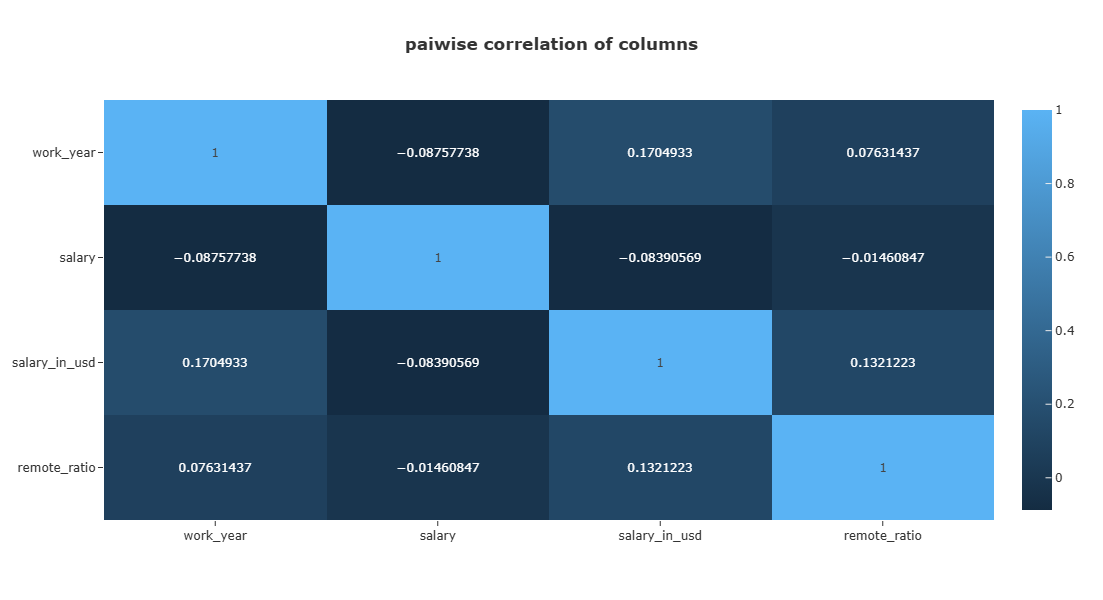

In [22]:
fig=px.imshow(df.corr(numeric_only = True),text_auto=True,height=600,width=600,template='ggplot2',aspect='auto',title='<b>paiwise correlation of columns</b>')
fig.update_layout(title_x=0.5)
fig.show()

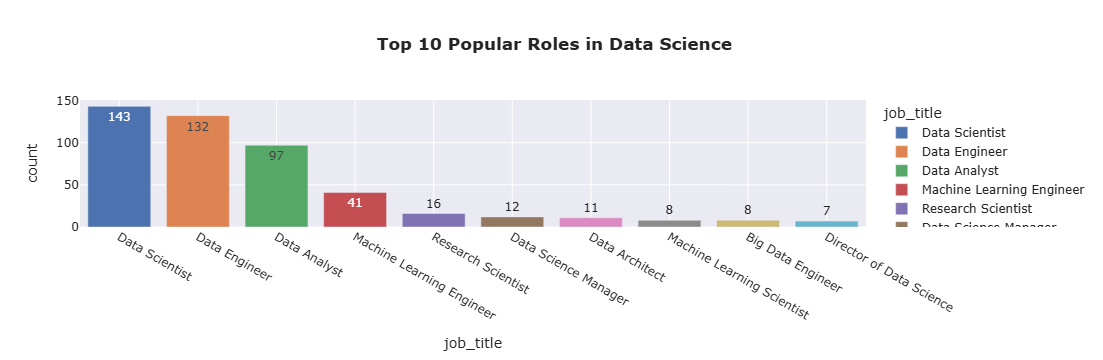

In [24]:

z=df['job_title'].value_counts().head(10)
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'job title','y':'count','text':'count'},template='seaborn',title='<b> Top 10 Popular Roles in Data Science')
fig.show()

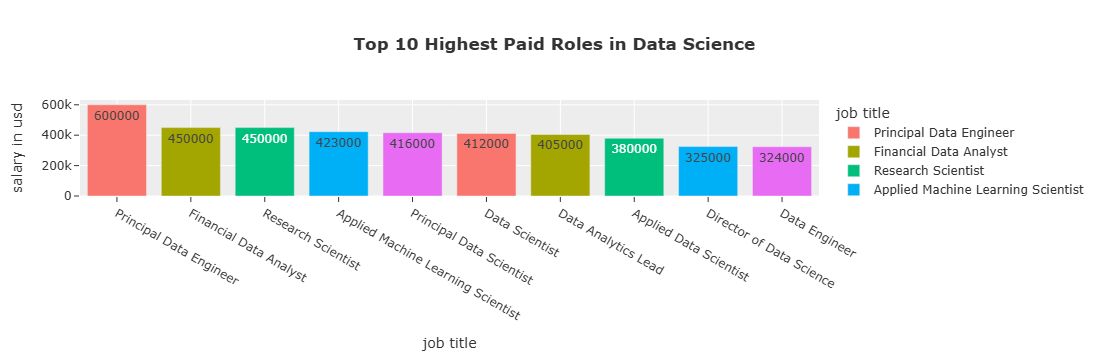

In [25]:
fig=px.bar(df.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'salary in usd'},template='ggplot2',text='salary_in_usd',title='<b> Top 10 Highest Paid Roles in Data Science')
fig.show()

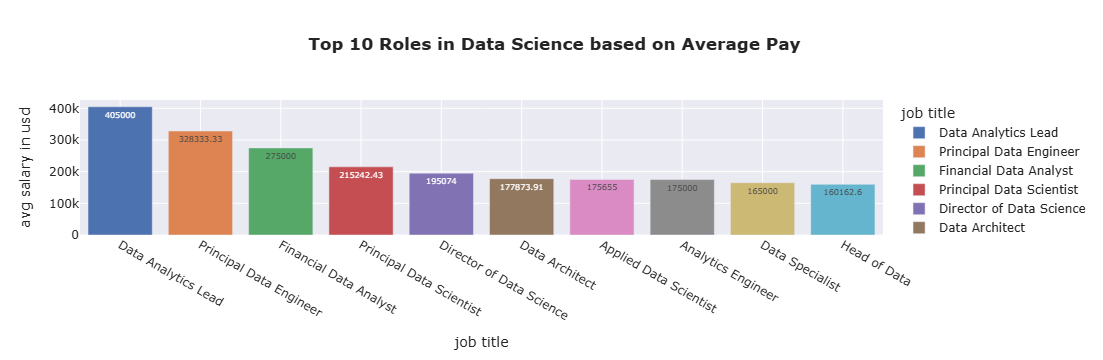

In [26]:
z=df.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False)
z['salary_in_usd']=round(z['salary_in_usd'],2)
fig=px.bar(z.head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'avg salary in usd'},text='salary_in_usd',template='seaborn',title='<b> Top 10 Roles in Data Science based on Average Pay')
fig.update_traces(textfont_size=8)
fig.show()

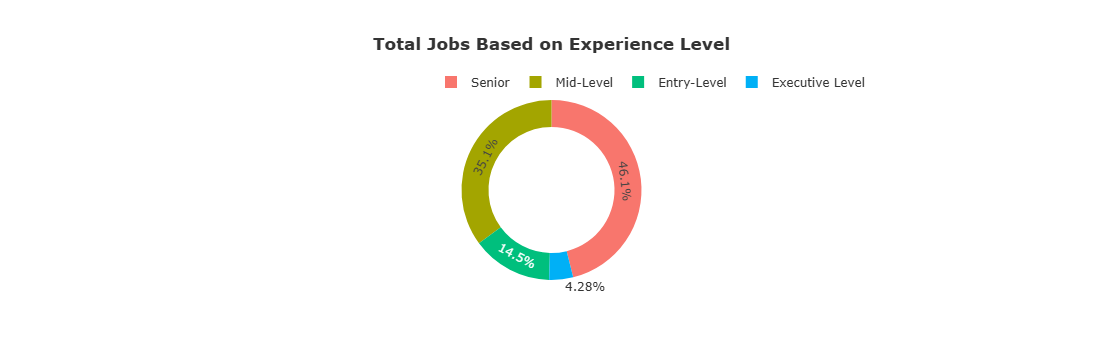

In [27]:
fig=px.pie(df.groupby('experience_level',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='experience_level',values='salary_in_usd',color='experience_level',hole=0.7,labels={'experience_level':'Experience level ','salary_in_usd':'count'},template='ggplot2',title='<b>Total Jobs Based on Experience Level')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

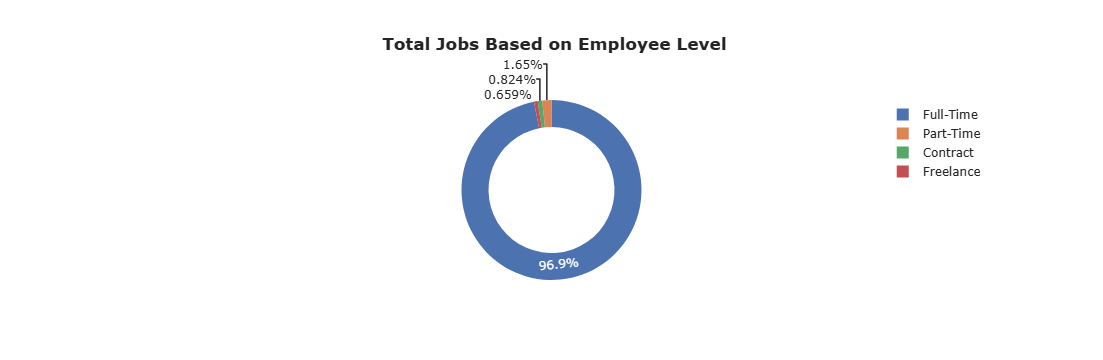

In [28]:
fig=px.pie(df.groupby('employment_type',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='employment_type',values='salary_in_usd',color='employment_type',hole=0.7,labels={'employment_type':'Employment level','salary_in_usd':'count'},template='seaborn',title='<b> Total Jobs Based on Employee Level')
fig.update_layout(title_x=0.5)

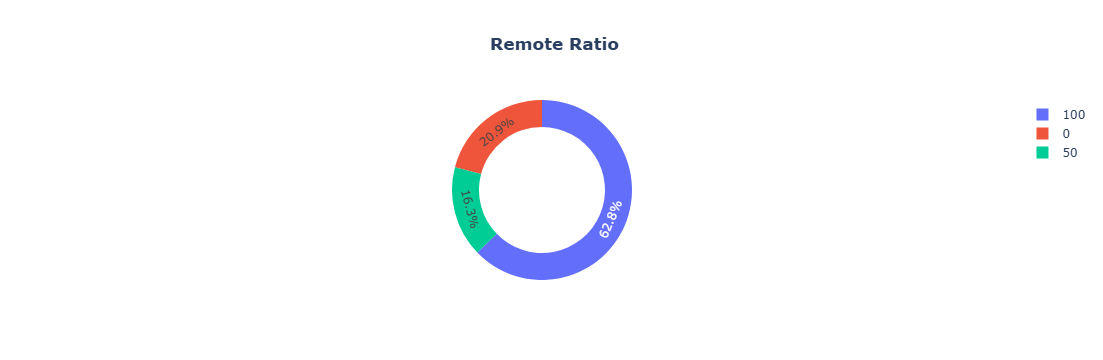

In [29]:
fig=px.pie(df.groupby('remote_ratio',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='remote_ratio',values='salary_in_usd',color='remote_ratio',hole=0.7,labels={'remote_ratio':'remote ratio','salary_in_usd':'count'},template='plotly',title='<b> Remote Ratio')
fig.update_layout(title_x=0.5)

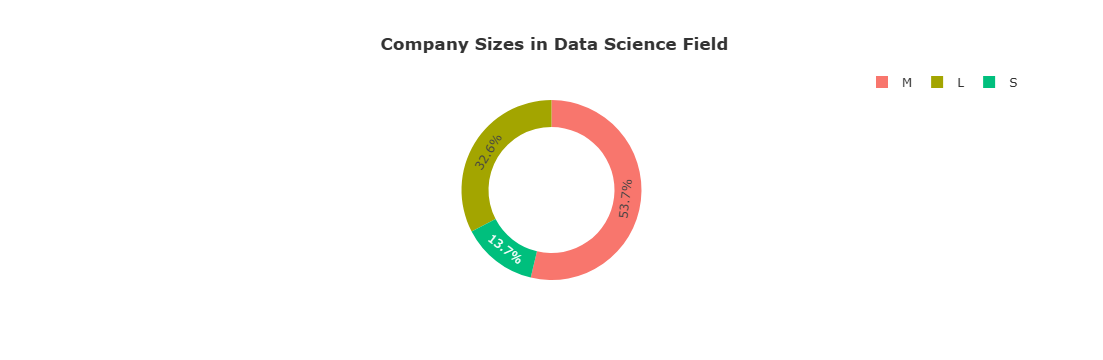

In [31]:
fig=px.pie(df.groupby('company_size',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='company_size',values='salary_in_usd',color='company_size',hole=0.7,labels={'company_size':'Company Size','salary_in_usd':'count'},template='ggplot2',title='<b> Company Sizes in Data Science Field')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

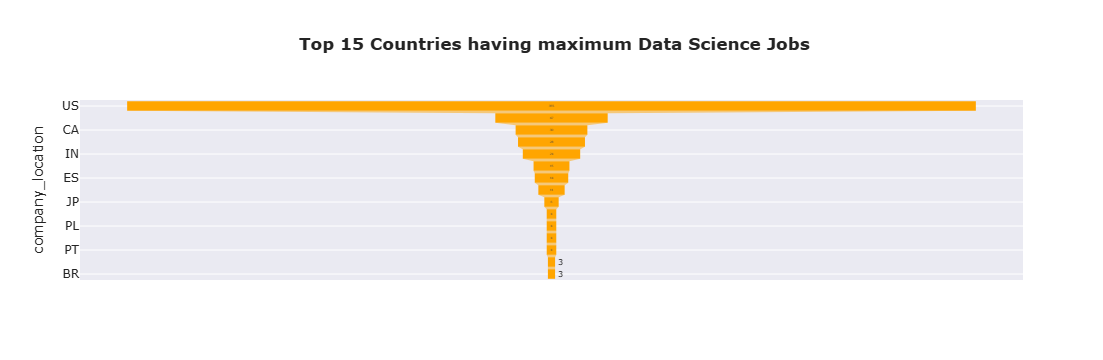

In [32]:
px.funnel(df.groupby('company_location',as_index=False)['experience_level'].count().sort_values(by='experience_level',ascending=False).head(15),y='company_location',x='experience_level',color_discrete_sequence=['orange'],labels={'experience_level':'count'},template='seaborn',title='<b> Top 15 Countries having maximum Data Science Jobs')

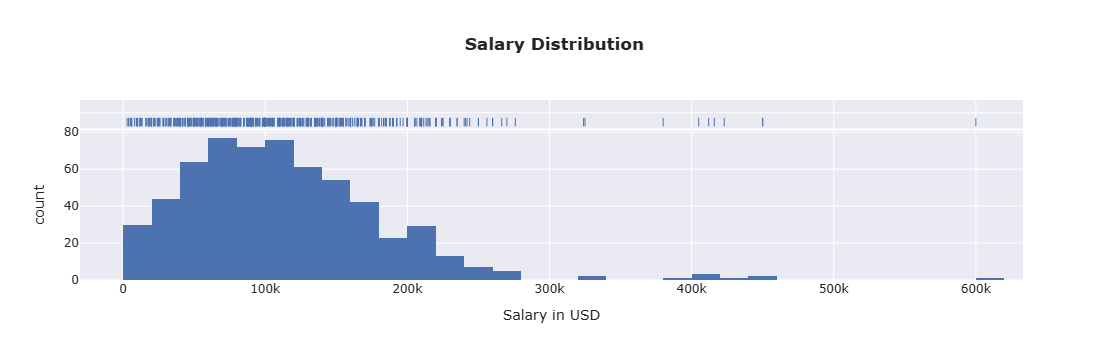

In [33]:
px.histogram(df,x='salary_in_usd',marginal='rug',template='seaborn',labels={'salary_in_usd':'Salary in USD'},title='<b> Salary Distribution')

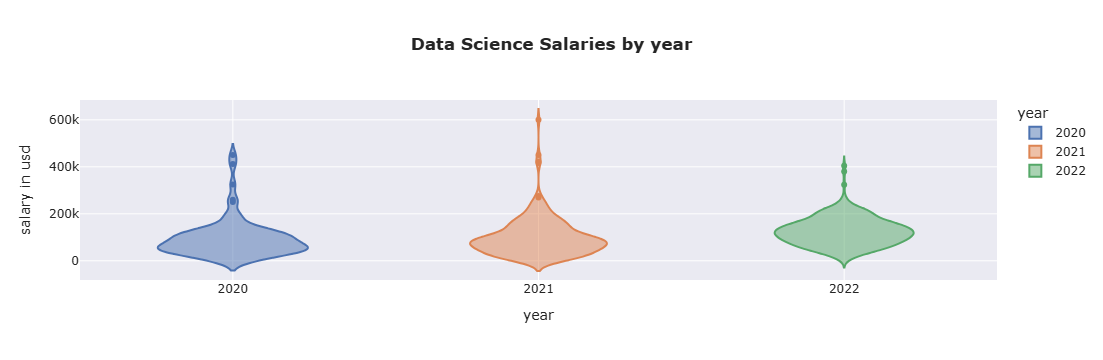

In [34]:
px.violin(df,x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'year','salary_in_usd':'salary in usd'},template='seaborn',title='<b>Data Science Salaries by year')

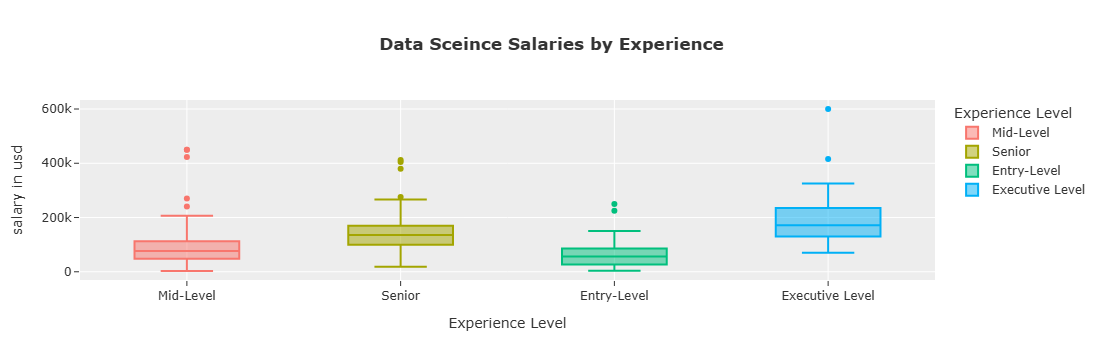

In [35]:
px.box(df,x='experience_level',y='salary_in_usd',color='experience_level',template='ggplot2',labels={'experience_level':'Experience Level','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by Experience')

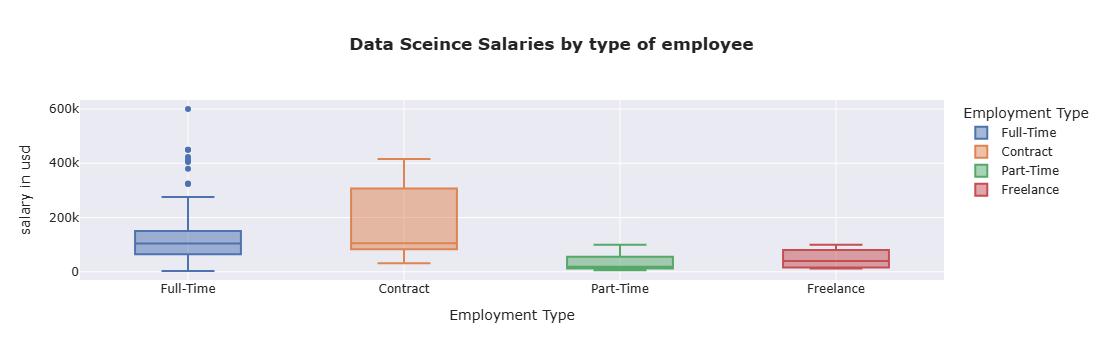

In [36]:
px.box(df,x='employment_type',y='salary_in_usd',color='employment_type',template='seaborn',labels={'employment_type':'Employment Type','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by type of employee')

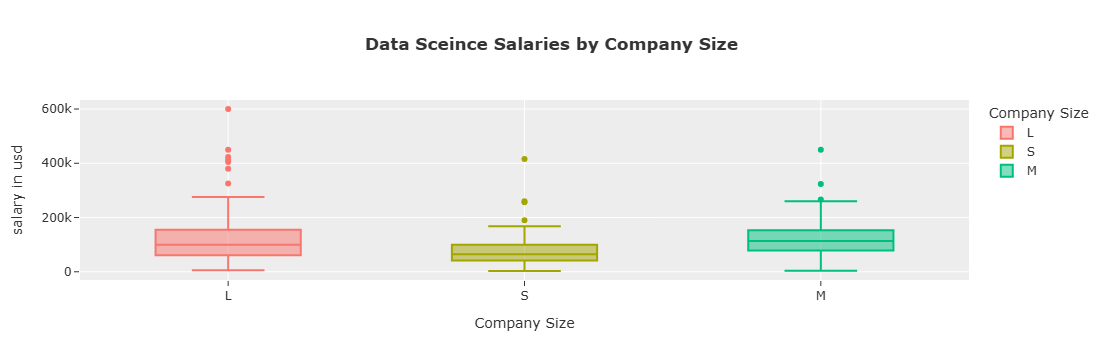

In [37]:
px.box(df,x='company_size',y='salary_in_usd',color='company_size',template='ggplot2',labels={'company_size':'Company Size','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by Company Size')

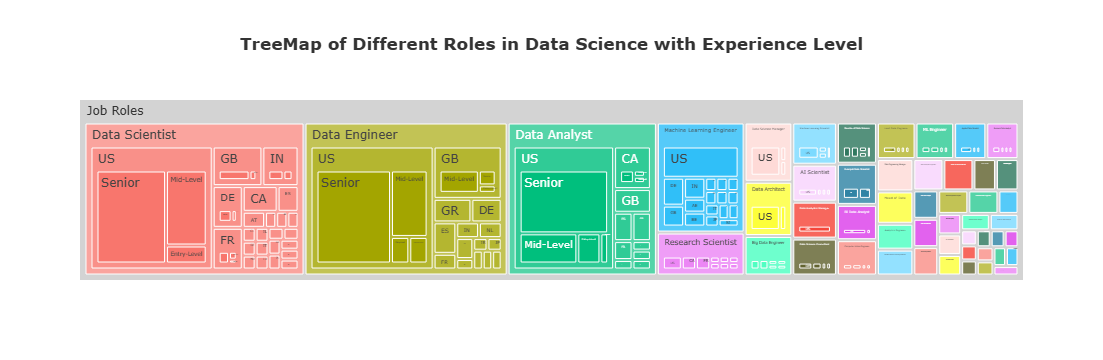

In [38]:
fig=px.treemap(df,path=[px.Constant('Job Roles'),'job_title','company_location','experience_level'],template='ggplot2',hover_name='job_title',title='<b>TreeMap of Different Roles in Data Science with Experience Level')
fig.update_traces(root_color='lightgrey')

CONCLUSION

From the Above Analysis, The Country which has Maximum Jobs in the Data Science Field is US and Contract type Employees has Maximum Salaries in Data Science field. Employees which has Experience as Senior and Executive Level has maximum salaries. The Top 5 Popular Roles in Data Science are

1.Data Scientist
Data Engineer
Data Analyst
ML Engineer
Reaserch Analyst